# FORWARD KINEMATICS SOLUTION OF A STEWART PLATFORM ACTUATED BY ROTARY MOTORS (DRAFT)


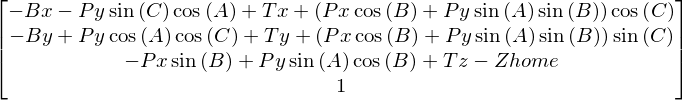

In [53]:
from sympy import *

x, y, A, B, C, Tx, Ty, Ty, Tz, Px, Py, Bx, By, Zhome = symbols("x y A B C Tx Ty Ty Tz Px Py Bx By Zhome")

P =    Matrix([[Px, Py, 0, 1]])

Rx =   Matrix([[      1,       0,       0,       0],
               [      0,  cos(A),  sin(A),       0],
               [      0, -sin(A),  cos(A),       0],
               [      0,       0,       0,       1]])

Ry =   Matrix([[ cos(B),       0, -sin(B),       0],
               [      0,       1,       0,       0],
               [ sin(B),       0,  cos(B),       0],
               [      0,       0,       0,       1]])

Rz =   Matrix([[ cos(C),  sin(C),       0,       0],
               [-sin(C),  cos(C),       0,       0],
               [      0,       0,       1,       0],
               [      0,       0,       0,       1]])

Txyz = Matrix([[      1,       0,       0,       0],
               [      0,       1,       0,       0],
               [      0,       0,       1,       0],
               [     Tx,      Ty,      Tz,       1]])

TB =   Matrix([[      1,       0,       0,       0],
               [      0,       1,       0,       0],
               [      0,       0,       1,       0],
               [    -Bx,     -By,  -Zhome,       1]])

BP = P * Rx * Ry * Rz * Txyz * TB

BP.T

In [74]:
labels = ["BP_x", "BP_y", "BP_z"]
for cpt, elem in enumerate(BP[:-1]):
    ans_c = ccode(elem, standard="C99")
    sep = "\n" if cpt > 0 else ""
    print(f"{sep}{labels[cpt]} = {ans_c};")

BP_x = -Bx - Py*sin(C)*cos(A) + Tx + (Px*cos(B) + Py*sin(A)*sin(B))*cos(C);

BP_y = -By + Py*cos(A)*cos(C) + Ty + (Px*cos(B) + Py*sin(A)*sin(B))*sin(C);

BP_z = -Px*sin(B) + Py*sin(A)*cos(B) + Tz - Zhome;


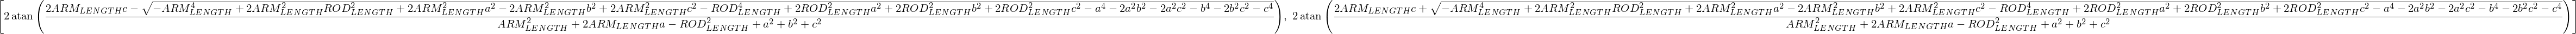

In [65]:
x, y, z, a, b, c, phi, ROD_LENGTH, ARM_LENGTH, theta_s = symbols("x y z a b c phi ROD_LENGTH ARM_LENGTH theta_s")

init_printing()

phi_ans = solve(((ARM_LENGTH*cos(phi)-a)**2 + b**2 + (ARM_LENGTH*sin(phi)-c)**2 - ROD_LENGTH**2), [phi],
          force=True, manual=True)

phi_ans

In [79]:
for cpt, elem in enumerate(phi_ans):
    ans_c = ccode(elem, standard="C99")
    sep = "\n" if cpt > 0 else ""
    print(f"{sep}phi_{cpt} = {ans_c};")

phi_0 = 2*atan((2*ARM_LENGTH*c - sqrt(-pow(ARM_LENGTH, 4) + 2*pow(ARM_LENGTH, 2)*pow(ROD_LENGTH, 2) + 2*pow(ARM_LENGTH, 2)*pow(a, 2) - 2*pow(ARM_LENGTH, 2)*pow(b, 2) + 2*pow(ARM_LENGTH, 2)*pow(c, 2) - pow(ROD_LENGTH, 4) + 2*pow(ROD_LENGTH, 2)*pow(a, 2) + 2*pow(ROD_LENGTH, 2)*pow(b, 2) + 2*pow(ROD_LENGTH, 2)*pow(c, 2) - pow(a, 4) - 2*pow(a, 2)*pow(b, 2) - 2*pow(a, 2)*pow(c, 2) - pow(b, 4) - 2*pow(b, 2)*pow(c, 2) - pow(c, 4)))/(pow(ARM_LENGTH, 2) + 2*ARM_LENGTH*a - pow(ROD_LENGTH, 2) + pow(a, 2) + pow(b, 2) + pow(c, 2)));

phi_1 = 2*atan((2*ARM_LENGTH*c + sqrt(-pow(ARM_LENGTH, 4) + 2*pow(ARM_LENGTH, 2)*pow(ROD_LENGTH, 2) + 2*pow(ARM_LENGTH, 2)*pow(a, 2) - 2*pow(ARM_LENGTH, 2)*pow(b, 2) + 2*pow(ARM_LENGTH, 2)*pow(c, 2) - pow(ROD_LENGTH, 4) + 2*pow(ROD_LENGTH, 2)*pow(a, 2) + 2*pow(ROD_LENGTH, 2)*pow(b, 2) + 2*pow(ROD_LENGTH, 2)*pow(c, 2) - pow(a, 4) - 2*pow(a, 2)*pow(b, 2) - 2*pow(a, 2)*pow(c, 2) - pow(b, 4) - 2*pow(b, 2)*pow(c, 2) - pow(c, 4)))/(pow(ARM_LENGTH, 2) + 2*ARM_LENGTH*a - pow(R